## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units = 10, num_neurons = [256, 128, 64], drop_ratio = 0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: 
            x = keras.layers.Dense(units = n_units, activation = 'relu')(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(x)
            x = Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.25, 0.35]
optimizers = ['sgd', 'adam']

In [12]:
from itertools import product

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for ratio, opt in product(Dropout_EXP, optimizers):
    keras.backend.clear_session()
    model = build_mlp(input_shape = x_train.shape[1:], drop_ratio = ratio)
    model.summary()
    
    if opt == 'sgd':
        optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    elif opt == 'adam':
        optimizer = keras.optimizers.Adam(lr = LEARNING_RATE)
    else: 
        print('Invalid optimizer')
        break
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_label = 'exp-ratio-%s-opt-%s' %(str(ratio), opt)
    results[exp_label] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0   

50000/50000 [==============================] - 3s 68us/step - loss: 1.3212 - accuracy: 0.5266 - val_loss: 1.3479 - val_accuracy: 0.5140
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3119 - accuracy: 0.5319 - val_loss: 1.3455 - val_accuracy: 0.5234
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3087 - accuracy: 0.5340 - val_loss: 1.3461 - val_accuracy: 0.5200
Epoch 49/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3009 - accuracy: 0.5372 - val_loss: 1.3323 - val_accuracy: 0.5239
Epoch 50/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2962 - accuracy: 0.5382 - val_loss: 1.3382 - val_accuracy: 0.5265
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________

50000/50000 [==============================] - 4s 81us/step - loss: 1.4432 - accuracy: 0.4830 - val_loss: 1.4262 - val_accuracy: 0.4910
Epoch 42/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4392 - accuracy: 0.4831 - val_loss: 1.4366 - val_accuracy: 0.4934
Epoch 43/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4403 - accuracy: 0.4816 - val_loss: 1.4230 - val_accuracy: 0.4932
Epoch 44/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4355 - accuracy: 0.4848 - val_loss: 1.4345 - val_accuracy: 0.4880
Epoch 45/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4299 - accuracy: 0.4883 - val_loss: 1.4272 - val_accuracy: 0.4903
Epoch 46/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4309 - accuracy: 0.4847 - val_loss: 1.4177 - val_accuracy: 0.4938
Epoch 47/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4310 - accuracy: 0.4864 - val_loss: 1.4337

50000/50000 [==============================] - 4s 71us/step - loss: 1.5025 - accuracy: 0.4646 - val_loss: 1.4220 - val_accuracy: 0.4946
Epoch 37/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4944 - accuracy: 0.4671 - val_loss: 1.4327 - val_accuracy: 0.4936
Epoch 38/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4883 - accuracy: 0.4662 - val_loss: 1.4191 - val_accuracy: 0.4910
Epoch 39/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4840 - accuracy: 0.4706 - val_loss: 1.4097 - val_accuracy: 0.4988
Epoch 40/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4750 - accuracy: 0.4745 - val_loss: 1.4113 - val_accuracy: 0.4952
Epoch 41/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4677 - accuracy: 0.4738 - val_loss: 1.4151 - val_accuracy: 0.4928
Epoch 42/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4624 - accuracy: 0.4761 - val_loss: 1.4004

50000/50000 [==============================] - 4s 82us/step - loss: 1.6689 - accuracy: 0.3959 - val_loss: 1.5874 - val_accuracy: 0.4323
Epoch 32/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6643 - accuracy: 0.4011 - val_loss: 1.5920 - val_accuracy: 0.4344
Epoch 33/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6624 - accuracy: 0.4000 - val_loss: 1.5830 - val_accuracy: 0.4393
Epoch 34/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6567 - accuracy: 0.4032 - val_loss: 1.5796 - val_accuracy: 0.4363
Epoch 35/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6585 - accuracy: 0.4016 - val_loss: 1.5637 - val_accuracy: 0.4481
Epoch 36/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6580 - accuracy: 0.4028 - val_loss: 1.5571 - val_accuracy: 0.4517
Epoch 37/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6523 - accuracy: 0.4019 - val_loss: 1.5690

50000/50000 [==============================] - 4s 72us/step - loss: 1.6579 - accuracy: 0.4103 - val_loss: 1.5417 - val_accuracy: 0.4604
Epoch 27/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6489 - accuracy: 0.4081 - val_loss: 1.5260 - val_accuracy: 0.4599
Epoch 28/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.6414 - accuracy: 0.4120 - val_loss: 1.5243 - val_accuracy: 0.4569
Epoch 29/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.6331 - accuracy: 0.4154 - val_loss: 1.5116 - val_accuracy: 0.4667
Epoch 30/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6269 - accuracy: 0.4200 - val_loss: 1.5123 - val_accuracy: 0.4581
Epoch 31/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6219 - accuracy: 0.4210 - val_loss: 1.4926 - val_accuracy: 0.4654
Epoch 32/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6119 - accuracy: 0.4234 - val_loss: 1.5041

50000/50000 [==============================] - 4s 87us/step - loss: 1.8674 - accuracy: 0.3145 - val_loss: 1.8260 - val_accuracy: 0.3458
Epoch 22/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8662 - accuracy: 0.3155 - val_loss: 1.8194 - val_accuracy: 0.3447
Epoch 23/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8666 - accuracy: 0.3132 - val_loss: 1.8138 - val_accuracy: 0.3506
Epoch 24/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8600 - accuracy: 0.3165 - val_loss: 1.7973 - val_accuracy: 0.3559
Epoch 25/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8584 - accuracy: 0.3183 - val_loss: 1.8302 - val_accuracy: 0.3419
Epoch 26/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8533 - accuracy: 0.3215 - val_loss: 1.8349 - val_accuracy: 0.3435
Epoch 27/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.8507 - accuracy: 0.3220 - val_loss: 1.7876

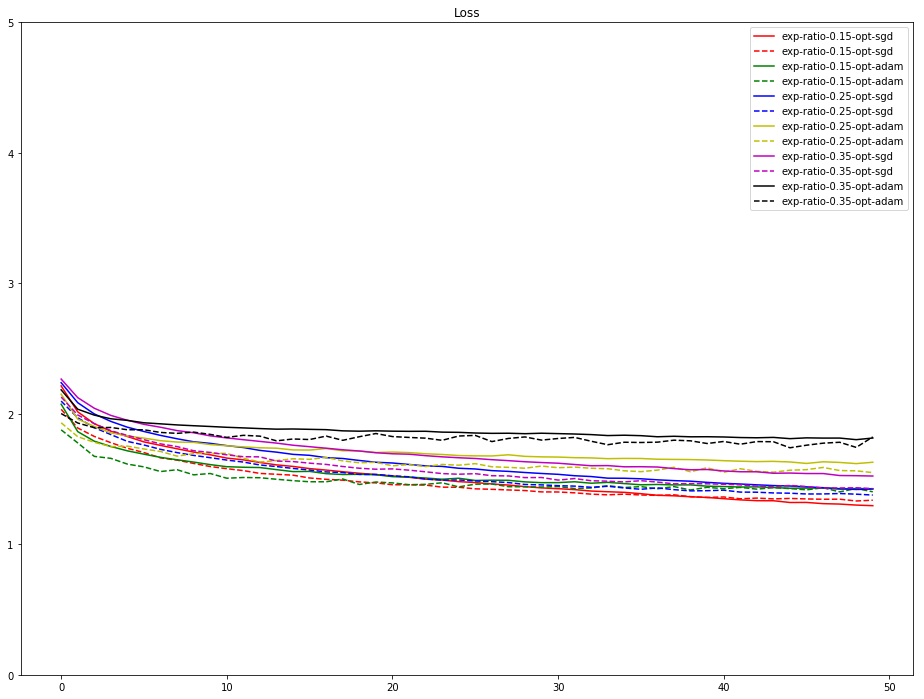

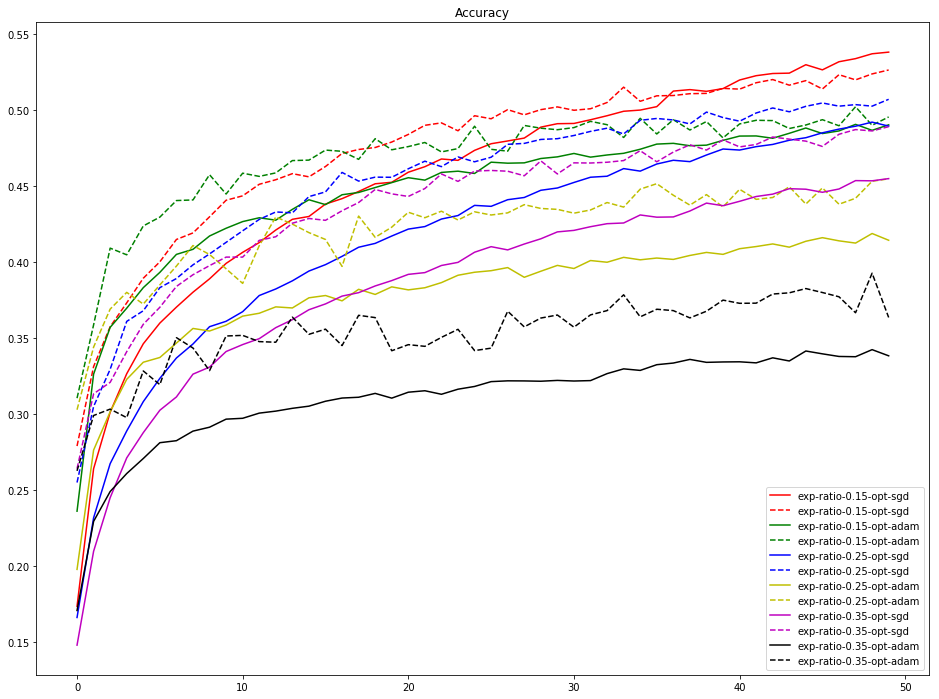

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()